In [2]:
from pathlib import Path
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


### Baseline Results

In [3]:
baseline_seed1_48_things_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results')

baseline_seed1_48_things_files = sorted([f for f in baseline_seed1_48_things_dir.glob('things_48_embeddings*') if f.is_file()])

print(f"Found {len(baseline_seed1_48_things_files)} epochs:")
for run_dir in baseline_seed1_48_things_files:
    print(f"  - {run_dir.name}")

Found 98 epochs:
  - things_48_embeddings_epoch1.csv
  - things_48_embeddings_epoch10.csv
  - things_48_embeddings_epoch11.csv
  - things_48_embeddings_epoch12.csv
  - things_48_embeddings_epoch13.csv
  - things_48_embeddings_epoch14.csv
  - things_48_embeddings_epoch15.csv
  - things_48_embeddings_epoch16.csv
  - things_48_embeddings_epoch17.csv
  - things_48_embeddings_epoch18.csv
  - things_48_embeddings_epoch19.csv
  - things_48_embeddings_epoch2.csv
  - things_48_embeddings_epoch20.csv
  - things_48_embeddings_epoch21.csv
  - things_48_embeddings_epoch22.csv
  - things_48_embeddings_epoch23.csv
  - things_48_embeddings_epoch24.csv
  - things_48_embeddings_epoch25.csv
  - things_48_embeddings_epoch26.csv
  - things_48_embeddings_epoch27.csv
  - things_48_embeddings_epoch28.csv
  - things_48_embeddings_epoch29.csv
  - things_48_embeddings_epoch3.csv
  - things_48_embeddings_epoch30.csv
  - things_48_embeddings_epoch31.csv
  - things_48_embeddings_epoch32.csv
  - things_48_embeddings

In [4]:
baseline_seed1_48_things_paths = [baseline_seed1_48_things_dir / f.name for f in baseline_seed1_48_things_files]

baseline_seed1_48_things_dict = {}

# loop through the files and read in the embeddings
for path in baseline_seed1_48_things_paths:
    epoch = path.name.split('_')[3].split('.')[0]
    embeddings = pd.read_csv(path)
    baseline_seed1_48_things_dict[epoch] = embeddings

print(baseline_seed1_48_things_dict.keys())

# turn the dict into a dataframe and add the epoch as a column
baseline_seed1_48_things_df = pd.concat(
    [df.assign(epoch=epoch) for epoch, df in baseline_seed1_48_things_dict.items()],
    ignore_index=True
)

print(baseline_seed1_48_things_df.tail())

dict_keys(['epoch1', 'epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19', 'epoch2', 'epoch20', 'epoch21', 'epoch22', 'epoch23', 'epoch24', 'epoch25', 'epoch26', 'epoch27', 'epoch28', 'epoch29', 'epoch3', 'epoch30', 'epoch31', 'epoch32', 'epoch33', 'epoch34', 'epoch35', 'epoch36', 'epoch37', 'epoch38', 'epoch39', 'epoch4', 'epoch40', 'epoch41', 'epoch42', 'epoch43', 'epoch44', 'epoch45', 'epoch46', 'epoch47', 'epoch48', 'epoch49', 'epoch5', 'epoch50', 'epoch51', 'epoch52', 'epoch53', 'epoch54', 'epoch55', 'epoch56', 'epoch57', 'epoch58', 'epoch59', 'epoch6', 'epoch60', 'epoch61', 'epoch62', 'epoch63', 'epoch64', 'epoch65', 'epoch66', 'epoch67', 'epoch68', 'epoch69', 'epoch7', 'epoch70', 'epoch71', 'epoch72', 'epoch73', 'epoch74', 'epoch75', 'epoch76', 'epoch77', 'epoch78', 'epoch79', 'epoch8', 'epoch80', 'epoch81', 'epoch82', 'epoch83', 'epoch84', 'epoch85', 'epoch86', 'epoch87', 'epoch88', 'epoch89', 'epoch9', 'epoch90', 'epoch91

In [5]:
# sort the dictionary keys by epoch 
# Extract numeric part from keys like 'epoch1', 'epoch10', etc.
baseline_seed1_48_things_dict_sorted = sorted(baseline_seed1_48_things_dict.items(), key=lambda x: int(re.search(r'epoch(\d+)', x[0]).group(1)))

# print the keys in the list
print(baseline_seed1_48_things_dict_sorted)

[('epoch1',                      image          0          1          2          3  \
0            pizza_01b.jpg   6.943114  15.599767  11.636721   6.773570   
1           beaver_01b.jpg   7.223513   8.017966  11.591485   6.929740   
2        macadamia_01b.jpg  10.292803  13.199526  11.482669  11.987718   
3        tarantula_01b.jpg   7.184866   8.734017  14.029031  12.680639   
4          clothes_01b.jpg  12.073318   8.573022  10.531206  15.179026   
5          doormat_01b.jpg  10.962253   8.618795  11.226881  12.751110   
6           hammer_01b.jpg  13.734033   8.450418  10.958121  10.690629   
7        mistletoe_01b.jpg   9.526073   9.547226   8.164411  10.387193   
8        washcloth_01b.jpg   8.625125   9.130649   6.863123  12.877670   
9            drain_01b.jpg  13.833113   8.087058  11.464775  11.580210   
10         furnace_01b.jpg  12.609008   6.566987   7.330486   9.957274   
11             tea_01b.jpg   8.824909  10.941963   8.976460  11.269738   
12         chariot_01b.jpg

In [6]:
path = '../Data/labels66.txt'
with open(path) as f:
    labels = [line.strip() for line in f.readlines()]

# baseline_seed1_48_things_dict_sorted is a list of (epoch, dataframe) tuples
for epoch, df in baseline_seed1_48_things_dict_sorted:
    df.columns = ['image'] + labels

baseline_seed1_48_things_dict_sorted

[('epoch1',
                       image  metallic/artificial  food-related  animal-related  \
  0            pizza_01b.jpg             6.943114     15.599767       11.636721   
  1           beaver_01b.jpg             7.223513      8.017966       11.591485   
  2        macadamia_01b.jpg            10.292803     13.199526       11.482669   
  3        tarantula_01b.jpg             7.184866      8.734017       14.029031   
  4          clothes_01b.jpg            12.073318      8.573022       10.531206   
  5          doormat_01b.jpg            10.962253      8.618795       11.226881   
  6           hammer_01b.jpg            13.734033      8.450418       10.958121   
  7        mistletoe_01b.jpg             9.526073      9.547226        8.164411   
  8        washcloth_01b.jpg             8.625125      9.130649        6.863123   
  9            drain_01b.jpg            13.833113      8.087058       11.464775   
  10         furnace_01b.jpg            12.609008      6.566987        7.33

In [7]:
# Create rank-ordered embeddings for each epoch
# For each image (row), rank the embedding dimensions (columns) by their values
# Highest value gets rank 1, second highest gets rank 2, etc.

baseline_seed1_48_things_ranked_dict = {}

for epoch_key, df in baseline_seed1_48_things_dict_sorted:
    # Select only numeric columns (embedding dimensions) for ranking
    # This excludes any non-numeric columns like image names if they exist
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Create a copy to store ranked values
    ranked_df = df.copy()
    
    # Rank columns for each row (axis=1)
    # ascending=False means highest value gets rank 1
    # method='dense' handles ties by assigning the same rank
    ranked_df[numeric_cols] = df[numeric_cols].rank(axis=1, ascending=False, method='dense')
    
    # Store with the same epoch key
    baseline_seed1_48_things_ranked_dict[epoch_key] = ranked_df
    
    if epoch_key == baseline_seed1_48_things_dict_sorted[0][0]:  # Print details for first epoch
        print(f"Example: {epoch_key}")
        print(f"  Original shape: {df.shape}")
        print(f"  Numeric columns: {len(numeric_cols)}")
        print(f"  Sample ranking for first image:")
        print(f"    Original values (top 3): {df[numeric_cols].iloc[0].nlargest(3).to_dict()}")
        print(f"    Ranks (top 3): {ranked_df[numeric_cols].iloc[0].nsmallest(3).to_dict()}")

# Show epoch 5 as the example from baseline_seed1_48_things_ranked_dict,
# and print the same details as in the ranking loop for the fifth epoch.

example_epoch = "epoch5"
df = baseline_seed1_48_things_dict_sorted[4][1]  # 5th epoch's dataframe (0-indexed)
ranked_df = baseline_seed1_48_things_ranked_dict[example_epoch]
numeric_cols = df.select_dtypes(include=[np.number]).columns

print(f"Example: {example_epoch}")
print(f"  Original shape: {df.shape}")
print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Sample ranking for first image:")
print(f"    Original values (top 3): {df[numeric_cols].iloc[0].nlargest(3).to_dict()}")
print(f"    Ranks (top 3): {ranked_df[numeric_cols].iloc[0].nsmallest(3).to_dict()}")

print(f"Example key: '{example_epoch}'")
print(ranked_df.head(2))

Example: epoch1
  Original shape: (48, 67)
  Numeric columns: 66
  Sample ranking for first image:
    Original values (top 3): {'food-related': 15.599767, 'bug-related / non-mammalian / disgusting': 15.335326, 'thin / flat / wrapping': 15.081249}
    Ranks (top 3): {'food-related': 1.0, 'bug-related / non-mammalian / disgusting': 2.0, 'thin / flat / wrapping': 3.0}
Example: epoch5
  Original shape: (48, 67)
  Numeric columns: 66
  Sample ranking for first image:
    Original values (top 3): {'food-related': 17.201605, 'metallic/artificial': 14.741895, 'animal-related': 13.167943}
    Ranks (top 3): {'food-related': 1.0, 'metallic/artificial': 2.0, 'animal-related': 3.0}
Example key: 'epoch5'
            image  metallic/artificial  food-related  animal-related  textile  \
0   pizza_01b.jpg                  2.0           1.0             3.0     26.0   
1  beaver_01b.jpg                  2.0           5.0             1.0      8.0   

   plant-related  house-related/furnishing-related  va

### Epoch 5 Results

In [8]:
# Directory containing the perturbation sweep results at epoch 5
sweep_trainingrun5_48_things_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run5/things_48_inference_results')

sweep_trainingrun5_48_things_files = sorted([f for f in sweep_trainingrun5_48_things_dir.glob('things_48_embeddings*') if f.is_file()])

print(f"Found {len(sweep_trainingrun5_48_things_files)} epochs:")
for run_dir in sweep_trainingrun5_48_things_files:
    print(f"  - {run_dir.name}")

Found 82 epochs:
  - things_48_embeddings_epoch10.csv
  - things_48_embeddings_epoch11.csv
  - things_48_embeddings_epoch12.csv
  - things_48_embeddings_epoch13.csv
  - things_48_embeddings_epoch14.csv
  - things_48_embeddings_epoch15.csv
  - things_48_embeddings_epoch16.csv
  - things_48_embeddings_epoch17.csv
  - things_48_embeddings_epoch18.csv
  - things_48_embeddings_epoch19.csv
  - things_48_embeddings_epoch20.csv
  - things_48_embeddings_epoch21.csv
  - things_48_embeddings_epoch22.csv
  - things_48_embeddings_epoch23.csv
  - things_48_embeddings_epoch24.csv
  - things_48_embeddings_epoch25.csv
  - things_48_embeddings_epoch26.csv
  - things_48_embeddings_epoch27.csv
  - things_48_embeddings_epoch28.csv
  - things_48_embeddings_epoch29.csv
  - things_48_embeddings_epoch30.csv
  - things_48_embeddings_epoch31.csv
  - things_48_embeddings_epoch32.csv
  - things_48_embeddings_epoch33.csv
  - things_48_embeddings_epoch34.csv
  - things_48_embeddings_epoch35.csv
  - things_48_embeddi

In [9]:
sweep_trainingrun5_48_things_paths = [sweep_trainingrun5_48_things_dir / f.name for f in sweep_trainingrun5_48_things_files]

sweep_trainingrun5_48_things_dict = {}

# loop through the files and read in the embeddings
for path in sweep_trainingrun5_48_things_paths:
    epoch = path.name.split('_')[3].split('.')[0]
    embeddings = pd.read_csv(path)
    sweep_trainingrun5_48_things_dict[epoch] = embeddings

print(sweep_trainingrun5_48_things_dict.keys())

# turn the dict into a dataframe and add the epoch as a column
sweep_trainingrun5_48_things_df = pd.concat(
    [df.assign(epoch=epoch) for epoch, df in sweep_trainingrun5_48_things_dict.items()],
    ignore_index=True
)

print(sweep_trainingrun5_48_things_df.head())

dict_keys(['epoch10', 'epoch11', 'epoch12', 'epoch13', 'epoch14', 'epoch15', 'epoch16', 'epoch17', 'epoch18', 'epoch19', 'epoch20', 'epoch21', 'epoch22', 'epoch23', 'epoch24', 'epoch25', 'epoch26', 'epoch27', 'epoch28', 'epoch29', 'epoch30', 'epoch31', 'epoch32', 'epoch33', 'epoch34', 'epoch35', 'epoch36', 'epoch37', 'epoch38', 'epoch39', 'epoch40', 'epoch41', 'epoch42', 'epoch43', 'epoch44', 'epoch45', 'epoch46', 'epoch47', 'epoch48', 'epoch49', 'epoch5', 'epoch50', 'epoch51', 'epoch52', 'epoch53', 'epoch54', 'epoch55', 'epoch56', 'epoch57', 'epoch58', 'epoch59', 'epoch6', 'epoch60', 'epoch61', 'epoch62', 'epoch63', 'epoch64', 'epoch65', 'epoch66', 'epoch67', 'epoch68', 'epoch69', 'epoch7', 'epoch70', 'epoch71', 'epoch72', 'epoch73', 'epoch74', 'epoch75', 'epoch76', 'epoch77', 'epoch78', 'epoch79', 'epoch8', 'epoch80', 'epoch81', 'epoch82', 'epoch83', 'epoch84', 'epoch85', 'epoch86', 'epoch9'])
               image          0          1          2          3          4  \
0      pizza

In [10]:
# sort the dictionary keys by epoch 
# Extract numeric part from keys like 'epoch1', 'epoch10', etc.
sweep_trainingrun5_48_things_dict_sorted = sorted(sweep_trainingrun5_48_things_dict.items(), key=lambda x: int(re.search(r'epoch(\d+)', x[0]).group(1)))

# print the keys in the list
print(sweep_trainingrun5_48_things_dict_sorted)

[('epoch5',                      image          0          1          2          3  \
0            pizza_01b.jpg   3.760228  11.751761   5.948312   1.854817   
1           beaver_01b.jpg   6.080522   5.232914   9.709425   2.933445   
2        macadamia_01b.jpg   8.915843  11.156794   7.902397   8.399467   
3        tarantula_01b.jpg   5.107970   4.702393   9.896120   7.274232   
4          clothes_01b.jpg   9.109113   4.567394   5.050641  10.389703   
5          doormat_01b.jpg   8.220489   3.220287   4.556961   7.198938   
6           hammer_01b.jpg  11.860644   4.969193   6.682228   6.655228   
7        mistletoe_01b.jpg   8.261316   6.991774   4.314702   7.237492   
8        washcloth_01b.jpg   7.154916   6.305078   2.436299   8.972821   
9            drain_01b.jpg  10.869675   3.239830   5.338375   6.149491   
10         furnace_01b.jpg  11.716960   4.221544   4.132684   6.433042   
11             tea_01b.jpg   7.859759   9.368220   5.738781   7.995802   
12         chariot_01b.jpg

In [11]:
path = '../Data/labels66.txt'
with open(path) as f:
    labels = [line.strip() for line in f.readlines()]

# baseline_seed1_48_things_dict_sorted is a list of (epoch, dataframe) tuples
for epoch, df in sweep_trainingrun5_48_things_dict_sorted:
    df.columns = ['image'] + labels

sweep_trainingrun5_48_things_dict_sorted

[('epoch5',
                       image  metallic/artificial  food-related  animal-related  \
  0            pizza_01b.jpg             3.760228     11.751761        5.948312   
  1           beaver_01b.jpg             6.080522      5.232914        9.709425   
  2        macadamia_01b.jpg             8.915843     11.156794        7.902397   
  3        tarantula_01b.jpg             5.107970      4.702393        9.896120   
  4          clothes_01b.jpg             9.109113      4.567394        5.050641   
  5          doormat_01b.jpg             8.220489      3.220287        4.556961   
  6           hammer_01b.jpg            11.860644      4.969193        6.682228   
  7        mistletoe_01b.jpg             8.261316      6.991774        4.314702   
  8        washcloth_01b.jpg             7.154916      6.305078        2.436299   
  9            drain_01b.jpg            10.869675      3.239830        5.338375   
  10         furnace_01b.jpg            11.716960      4.221544        4.13

In [12]:
# Create rank-ordered embeddings for each epoch
# For each image (row), rank the embedding dimensions (columns) by their values
# Highest value gets rank 1, second highest gets rank 2, etc.

sweep_trainingrun5_48_things_ranked_dict = {}

for epoch_key, df in sweep_trainingrun5_48_things_dict_sorted:
    # Select only numeric columns (embedding dimensions) for ranking
    # This excludes any non-numeric columns like image names if they exist
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # Create a copy to store ranked values
    ranked_df = df.copy()
    
    # Rank columns for each row (axis=1)
    # ascending=False means highest value gets rank 1
    # method='dense' handles ties by assigning the same rank
    ranked_df[numeric_cols] = df[numeric_cols].rank(axis=1, ascending=False, method='dense')
    
    # Store with the same epoch key
    sweep_trainingrun5_48_things_ranked_dict[epoch_key] = ranked_df
    
    if epoch_key == sweep_trainingrun5_48_things_dict_sorted[0][0]:  # Print details for first epoch
        print(f"Example: {epoch_key}")
        print(f"  Original shape: {df.shape}")
        print(f"  Numeric columns: {len(numeric_cols)}")
        print(f"  Sample ranking for first image:")
        print(f"    Original values (top 3): {df[numeric_cols].iloc[0].nlargest(3).to_dict()}")
        print(f"    Ranks (top 3): {ranked_df[numeric_cols].iloc[0].nsmallest(3).to_dict()}")

# Show an example from baseline_seed1_48_things_ranked_dict:
example_epoch = list(sweep_trainingrun5_48_things_ranked_dict.keys())[0]
print(f"Example key: '{example_epoch}'")
print(sweep_trainingrun5_48_things_ranked_dict[example_epoch].head(2))

Example: epoch5
  Original shape: (48, 67)
  Numeric columns: 66
  Sample ranking for first image:
    Original values (top 3): {'food-related': 11.751761, 'yellow': 9.278833, 'circular / round': 8.83803}
    Ranks (top 3): {'food-related': 1.0, 'yellow': 2.0, 'circular / round': 3.0}
Example key: 'epoch5'
            image  metallic/artificial  food-related  animal-related  textile  \
0   pizza_01b.jpg                 58.0           1.0            30.0     66.0   
1  beaver_01b.jpg                 11.0          19.0             1.0     55.0   

   plant-related  house-related/furnishing-related  valuable/precious  \
0           44.0                              57.0                8.0   
1           56.0                              45.0               25.0   

   transportation-/movement-related  body-/people-related  ...  \
0                              54.0                  37.0  ...   
1                              26.0                  47.0  ...   

   medicine-related / health-

### Compare ranks between baseline and epoch 5 sweep

In [13]:
# Compare ranks between baseline and sweep
# For each epoch in baseline, if matching epoch exists in sweep:
#   For each image (row):
#     - For every dimension (column):
#       - Get the rank of that dimension for that image in baseline
#       - Get the rank of that dimension for that image in sweep
#       - Calculate: baseline_rank - sweep_rank

baseline_sweep_rank_differences = {}

for epoch_key, baseline_df in baseline_seed1_48_things_ranked_dict.items():
    # Check if matching epoch exists in sweep
    if epoch_key not in sweep_trainingrun5_48_things_ranked_dict:
        print(f"Skipping {epoch_key}: no matching epoch in sweep")
        continue
    
    sweep_df = sweep_trainingrun5_48_things_ranked_dict[epoch_key]
    
    # Get numeric columns (embedding dimensions)
    baseline_numeric_cols = baseline_df.select_dtypes(include=[np.number]).columns
    sweep_numeric_cols = sweep_df.select_dtypes(include=[np.number]).columns
    
    # Ensure both dataframes have the same columns and rows
    common_cols = baseline_numeric_cols.intersection(sweep_numeric_cols)
    if len(common_cols) == 0:
        print(f"Skipping {epoch_key}: no common columns")
        continue
    
    # Ensure same number of rows and same index
    if len(baseline_df) != len(sweep_df):
        print(f"Warning: {epoch_key} has different number of rows ({len(baseline_df)} vs {len(sweep_df)})")
        continue
    
    # Store rank differences for this epoch
    rank_differences = []
    
    # Loop through each row (image)
    for idx in baseline_df.index:
        # Get image identifier
        image_id = baseline_df.loc[idx, 'image'] if 'image' in baseline_df.columns else idx
        
        # Loop through every dimension (column)
        for col in common_cols:
            baseline_rank = baseline_df.loc[idx, col]
            sweep_rank = sweep_df.loc[idx, col]
            
            # Calculate difference: baseline_rank - sweep_rank
            rank_diff = baseline_rank - sweep_rank
            
            rank_differences.append({
                'image': image_id,
                'dimension': col,
                'baseline_rank': baseline_rank,
                'sweep_rank': sweep_rank,
                'rank_difference': rank_diff
            })
    
    # Store results for this epoch
    baseline_sweep_rank_differences[epoch_key] = pd.DataFrame(rank_differences)
    
    if epoch_key == list(baseline_seed1_48_things_ranked_dict.keys())[0]:  # Print example for first epoch
        print(f"Example epoch: {epoch_key}")
        print(f"  Total comparisons: {len(rank_differences)}")
        print(f"  Expected: {len(baseline_df)} images × {len(common_cols)} dimensions = {len(baseline_df) * len(common_cols)}")
        print(f"  Sample differences:")
        print(baseline_sweep_rank_differences[epoch_key].head(10))

print(f"\nTotal epochs compared: {len(baseline_sweep_rank_differences)}")

Skipping epoch1: no matching epoch in sweep
Skipping epoch2: no matching epoch in sweep
Skipping epoch3: no matching epoch in sweep
Skipping epoch4: no matching epoch in sweep


Skipping epoch87: no matching epoch in sweep
Skipping epoch88: no matching epoch in sweep
Skipping epoch89: no matching epoch in sweep
Skipping epoch90: no matching epoch in sweep
Skipping epoch91: no matching epoch in sweep
Skipping epoch92: no matching epoch in sweep
Skipping epoch93: no matching epoch in sweep
Skipping epoch94: no matching epoch in sweep
Skipping epoch95: no matching epoch in sweep
Skipping epoch96: no matching epoch in sweep
Skipping epoch97: no matching epoch in sweep
Skipping epoch98: no matching epoch in sweep

Total epochs compared: 82


In [14]:
# Compare original embedding values (not ranks) for all dimensions
# For each epoch in baseline ranked dict, if matching epoch exists in sweep:
#   For each image (row):
#     - For every dimension (column):
#       - Get the original VALUE for that dimension in baseline dict
#       - Get the original VALUE for that dimension in sweep dict
#       - Calculate: baseline_value - sweep_value

# Convert sorted lists to dictionaries for easier lookup
baseline_seed1_48_things_dict = dict(baseline_seed1_48_things_dict_sorted)
sweep_trainingrun5_48_things_dict = dict(sweep_trainingrun5_48_things_dict_sorted)

baseline_sweep_value_differences = {}

for epoch_key, baseline_ranked_df in baseline_seed1_48_things_ranked_dict.items():
    # Check if matching epoch exists in sweep
    if epoch_key not in sweep_trainingrun5_48_things_dict:
        print(f"Skipping {epoch_key}: no matching epoch in sweep")
        continue
    
    # Get original value dataframes (not ranked)
    baseline_df = baseline_seed1_48_things_dict[epoch_key]
    sweep_df = sweep_trainingrun5_48_things_dict[epoch_key]
    
    # Get numeric columns (embedding dimensions)
    baseline_ranked_numeric_cols = baseline_ranked_df.select_dtypes(include=[np.number]).columns
    baseline_numeric_cols = baseline_df.select_dtypes(include=[np.number]).columns
    sweep_numeric_cols = sweep_df.select_dtypes(include=[np.number]).columns
    
    # Ensure all dataframes have the same columns and rows
    common_cols = baseline_ranked_numeric_cols.intersection(baseline_numeric_cols).intersection(sweep_numeric_cols)
    if len(common_cols) == 0:
        print(f"Skipping {epoch_key}: no common columns")
        continue
    
    # Ensure same number of rows
    if len(baseline_ranked_df) != len(baseline_df) or len(baseline_df) != len(sweep_df):
        print(f"Warning: {epoch_key} has different number of rows")
        continue
    
    # Store value differences for this epoch
    value_differences = []
    
    # Loop through each row (image)
    for idx in baseline_ranked_df.index:
        # Get image identifier
        image_id = baseline_df.loc[idx, 'image'] if 'image' in baseline_df.columns else idx
        
        # Loop through every dimension (column)
        for col in common_cols:
            baseline_value = baseline_df.loc[idx, col]
            sweep_value = sweep_df.loc[idx, col]
            baseline_rank = baseline_ranked_df.loc[idx, col]
            
            # Calculate difference: baseline_value - sweep_value
            value_diff = sweep_value - baseline_value
            
            value_differences.append({
                'image': image_id,
                'dimension': col,
                'baseline_rank': baseline_rank,
                'baseline_value': baseline_value,
                'sweep_value': sweep_value,
                'value_difference': value_diff
            })
    
    # Store results for this epoch
    baseline_sweep_value_differences[epoch_key] = pd.DataFrame(value_differences)
    
    if epoch_key == list(baseline_seed1_48_things_ranked_dict.keys())[0]:  # Print example for first epoch
        print(f"Example epoch: {epoch_key}")
        print(f"  Total comparisons: {len(value_differences)}")
        print(f"  Expected: {len(baseline_df)} images × {len(common_cols)} dimensions = {len(baseline_df) * len(common_cols)}")
        print(f"  Sample value differences:")
        print(baseline_sweep_value_differences[epoch_key].head(10))

print(f"\nTotal epochs compared: {len(baseline_sweep_value_differences)}")

Skipping epoch1: no matching epoch in sweep
Skipping epoch2: no matching epoch in sweep
Skipping epoch3: no matching epoch in sweep
Skipping epoch4: no matching epoch in sweep


Skipping epoch87: no matching epoch in sweep
Skipping epoch88: no matching epoch in sweep
Skipping epoch89: no matching epoch in sweep
Skipping epoch90: no matching epoch in sweep
Skipping epoch91: no matching epoch in sweep
Skipping epoch92: no matching epoch in sweep
Skipping epoch93: no matching epoch in sweep
Skipping epoch94: no matching epoch in sweep
Skipping epoch95: no matching epoch in sweep
Skipping epoch96: no matching epoch in sweep
Skipping epoch97: no matching epoch in sweep
Skipping epoch98: no matching epoch in sweep

Total epochs compared: 82


In [15]:
print(baseline_sweep_value_differences)

{'epoch5':                image                              dimension  baseline_rank  \
0      pizza_01b.jpg                    metallic/artificial            2.0   
1      pizza_01b.jpg                           food-related            1.0   
2      pizza_01b.jpg                         animal-related            3.0   
3      pizza_01b.jpg                                textile           26.0   
4      pizza_01b.jpg                          plant-related            9.0   
...              ...                                    ...            ...   
3163  bucket_01b.jpg      coldness-related / winter-related           63.0   
3164  bucket_01b.jpg  measurement-related / numbers-related           41.0   
3165  bucket_01b.jpg                          fluffy / soft           61.0   
3166  bucket_01b.jpg              masculine (stereotypical)           60.0   
3167  bucket_01b.jpg                   fine-grained pattern           58.0   

      baseline_value  sweep_value  value_difference 

In [16]:
# Average the value_difference for every image's dimensions at each rank level
# For each epoch:
#   - For each rank (1, 2, 3, etc.):
#     - Find all dimensions with that rank for each image
#     - Get the value_difference for those dimension-image pairs
#     - Average across all images in that epoch

baseline_sweep_ranked_value_differences_avg = {}

for epoch_key, value_diff_df in baseline_sweep_value_differences.items():
    if len(value_diff_df) == 0:
        print(f"Warning: {epoch_key} has no data")
        continue
    
    # Get unique ranks in this epoch
    unique_ranks = sorted(value_diff_df['baseline_rank'].unique())
    
    rank_stats = {}
    
    # For each rank level
    for rank in unique_ranks:
        # Filter to dimensions with this rank
        rank_df = value_diff_df[value_diff_df['baseline_rank'] == rank].copy()
        
        if len(rank_df) == 0:
            continue
        
        # Handle ties: if an image has multiple dimensions with the same rank, average them
        # Group by image and average the value_difference for tied dimensions at this rank
        image_avg_differences = rank_df.groupby('image')['value_difference'].mean()
        
        # Average across all images in this epoch for this rank
        rank_avg = image_avg_differences.mean()
        
        rank_stats[rank] = {
            'average_value_difference': rank_avg,
            'num_images': len(image_avg_differences),
            'num_comparisons': len(rank_df),
            'std_value_difference': image_avg_differences.std(),
            'min_value_difference': image_avg_differences.min(),
            'max_value_difference': image_avg_differences.max()
        }
    
    baseline_sweep_ranked_value_differences_avg[epoch_key] = rank_stats

# Convert to a more readable format: DataFrame with epoch and rank as index
all_results = []
for epoch_key, rank_stats in baseline_sweep_ranked_value_differences_avg.items():
    for rank, stats in rank_stats.items():
        all_results.append({
            'epoch': epoch_key,
            'rank': rank,
            **stats
        })

ranked_avg_results_df = pd.DataFrame(all_results)

print("Average value_difference for each rank level per epoch:")
print(ranked_avg_results_df.head(30))
print(f"\nTotal epoch-rank combinations: {len(ranked_avg_results_df)}")
print(f"\nUnique ranks: {sorted(ranked_avg_results_df['rank'].unique())}")
print(f"\nOverall statistics by rank:")
rank_summary = ranked_avg_results_df.groupby('rank')['average_value_difference'].agg(['mean', 'std', 'min', 'max'])
print(rank_summary.head(20))

Average value_difference for each rank level per epoch:
     epoch  rank  average_value_difference  num_images  num_comparisons  \
0   epoch5   1.0                -10.980766          48               48   
1   epoch5   2.0                 -5.323196          48               48   
2   epoch5   3.0                 -3.574839          48               48   
3   epoch5   4.0                 -4.074532          48               48   
4   epoch5   5.0                 -2.880641          48               48   
5   epoch5   6.0                 -2.548991          48               48   
6   epoch5   7.0                 -2.350884          48               48   
7   epoch5   8.0                 -2.605469          48               48   
8   epoch5   9.0                 -2.232164          48               48   
9   epoch5  10.0                 -1.777230          48               48   
10  epoch5  11.0                 -1.619993          48               48   
11  epoch5  12.0                 -2.002843  

In [51]:
# Reusable functions for processing experiment data and creating the "Average Value Difference" heatmap

def load_and_process_embeddings(embeddings_dir, labels_path='../Data/labels66.txt'):
    """
    Load embeddings from directory and process them.
    
    Parameters:
    -----------
    embeddings_dir : str or Path
        Directory containing embedding CSV files (e.g., things_48_embeddings_epoch1.csv)
    labels_path : str or Path
        Path to labels file (default: '../Data/labels66.txt')
    
    Returns:
    --------
    dict_sorted : list of tuples
        Sorted list of (epoch, dataframe) tuples
    """
    embeddings_dir = Path(embeddings_dir)
    
    # Load embedding files
    embedding_files = sorted([f for f in embeddings_dir.glob('things_48_embeddings*') if f.is_file()])
    
    if len(embedding_files) == 0:
        raise ValueError(f"No embedding files found in {embeddings_dir}")
    
    # Read embeddings into dictionary
    embeddings_dict = {}
    for path in embedding_files:
        epoch = path.name.split('_')[3].split('.')[0]
        embeddings = pd.read_csv(path)
        embeddings_dict[epoch] = embeddings
    
    # Sort by epoch number
    embeddings_dict_sorted = sorted(
        embeddings_dict.items(), 
        key=lambda x: int(re.search(r'epoch(\d+)', x[0]).group(1))
    )
    
    # Load labels and assign column names
    labels_path = Path(labels_path)
    if not labels_path.exists():
        raise FileNotFoundError(f"Labels file not found: {labels_path}")
    
    with open(labels_path) as f:
        labels = [line.strip() for line in f.readlines()]
    
    # Assign column names
    for epoch, df in embeddings_dict_sorted:
        df.columns = ['image'] + labels
    
    return embeddings_dict_sorted


def create_rank_ordered_embeddings(embeddings_dict_sorted):
    """
    Create rank-ordered embeddings for each epoch.
    
    Parameters:
    -----------
    embeddings_dict_sorted : list of tuples
        Sorted list of (epoch, dataframe) tuples
    
    Returns:
    --------
    ranked_dict : dict
        Dictionary mapping epoch keys to ranked dataframes
    """
    ranked_dict = {}
    
    for epoch_key, df in embeddings_dict_sorted:
        # Select only numeric columns (embedding dimensions)
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        
        # Create a copy to store ranked values
        ranked_df = df.copy()
        
        # Rank columns for each row (axis=1)
        # ascending=False means highest value gets rank 1
        # method='dense' handles ties by assigning the same rank
        ranked_df[numeric_cols] = df[numeric_cols].rank(axis=1, ascending=False, method='dense')
        
        # Store with the same epoch key
        ranked_dict[epoch_key] = ranked_df
    
    return ranked_dict


def compute_value_differences(baseline_dict_sorted, baseline_ranked_dict, sweep_dict_sorted):
    """
    Compute value differences between baseline and sweep embeddings.
    
    Parameters:
    -----------
    baseline_dict_sorted : list of tuples
        Sorted list of (epoch, dataframe) tuples for baseline
    baseline_ranked_dict : dict
        Dictionary mapping epoch keys to ranked baseline dataframes
    sweep_dict_sorted : list of tuples
        Sorted list of (epoch, dataframe) tuples for sweep
    
    Returns:
    --------
    value_differences : dict
        Dictionary mapping epoch keys to DataFrames with value differences
    """
    # Convert sorted lists to dictionaries for easier lookup
    baseline_dict = dict(baseline_dict_sorted)
    sweep_dict = dict(sweep_dict_sorted)
    
    value_differences = {}
    
    for epoch_key, baseline_ranked_df in baseline_ranked_dict.items():
        # Check if matching epoch exists in sweep
        if epoch_key not in sweep_dict:
            continue
        
        # Get original value dataframes (not ranked)
        baseline_df = baseline_dict[epoch_key]
        sweep_df = sweep_dict[epoch_key]
        
        # Get numeric columns (embedding dimensions)
        baseline_ranked_numeric_cols = baseline_ranked_df.select_dtypes(include=[np.number]).columns
        baseline_numeric_cols = baseline_df.select_dtypes(include=[np.number]).columns
        sweep_numeric_cols = sweep_df.select_dtypes(include=[np.number]).columns
        
        # Ensure all dataframes have the same columns and rows
        common_cols = baseline_ranked_numeric_cols.intersection(baseline_numeric_cols).intersection(sweep_numeric_cols)
        if len(common_cols) == 0:
            continue
        
        # Ensure same number of rows
        if len(baseline_ranked_df) != len(baseline_df) or len(baseline_df) != len(sweep_df):
            continue
        
        # Store value differences for this epoch
        value_diff_list = []
        
        # Loop through each row (image)
        for idx in baseline_ranked_df.index:
            # Get image identifier
            image_id = baseline_df.loc[idx, 'image'] if 'image' in baseline_df.columns else idx
            
            # Loop through every dimension (column)
            for col in common_cols:
                baseline_value = baseline_df.loc[idx, col]
                sweep_value = sweep_df.loc[idx, col]
                baseline_rank = baseline_ranked_df.loc[idx, col]
                
                # Calculate difference: sweep_value - baseline_value
                value_diff = sweep_value - baseline_value
                
                value_diff_list.append({
                    'image': image_id,
                    'dimension': col,
                    'baseline_rank': baseline_rank,
                    'baseline_value': baseline_value,
                    'sweep_value': sweep_value,
                    'value_difference': value_diff
                })
        
        # Store results for this epoch
        value_differences[epoch_key] = pd.DataFrame(value_diff_list)
    
    return value_differences


def average_value_differences_by_rank(value_differences):
    """
    Average value differences by rank for each epoch.
    
    Parameters:
    -----------
    value_differences : dict
        Dictionary mapping epoch keys to DataFrames with value differences
    
    Returns:
    --------
    ranked_avg_results_df : DataFrame
        DataFrame with columns: epoch, rank, average_value_difference, etc.
    """
    ranked_avg_results = {}
    
    for epoch_key, value_diff_df in value_differences.items():
        if len(value_diff_df) == 0:
            continue
        
        # Get unique ranks in this epoch
        unique_ranks = sorted(value_diff_df['baseline_rank'].unique())
        
        rank_stats = {}
        
        # For each rank level
        for rank in unique_ranks:
            # Filter to dimensions with this rank
            rank_df = value_diff_df[value_diff_df['baseline_rank'] == rank].copy()
            
            if len(rank_df) == 0:
                continue
            
            # Handle ties: if an image has multiple dimensions with the same rank, average them
            # Group by image and average the value_difference for tied dimensions at this rank
            image_avg_differences = rank_df.groupby('image')['value_difference'].mean()
            
            # Average across all images in this epoch for this rank
            rank_avg = image_avg_differences.mean()
            
            rank_stats[rank] = {
                'average_value_difference': rank_avg,
                'num_images': len(image_avg_differences),
                'num_comparisons': len(rank_df),
                'std_value_difference': image_avg_differences.std(),
                'min_value_difference': image_avg_differences.min(),
                'max_value_difference': image_avg_differences.max()
            }
        
        ranked_avg_results[epoch_key] = rank_stats
    
    # Convert to DataFrame
    all_results = []
    for epoch_key, rank_stats in ranked_avg_results.items():
        for rank, stats in rank_stats.items():
            all_results.append({
                'epoch': epoch_key,
                'rank': rank,
                **stats
            })
    
    ranked_avg_results_df = pd.DataFrame(all_results)
    return ranked_avg_results_df


def create_average_value_difference_heatmap(ranked_avg_results_df, max_epochs=None, figsize=None, show_text=True):
    """
    Create the "Average Value Difference" heatmap.
    
    Parameters:
    -----------
    ranked_avg_results_df : DataFrame
        DataFrame with columns: epoch, rank, average_value_difference
    max_epochs : int or None
        Maximum number of epochs to display (None = all epochs)
    figsize : tuple or None
        Figure size (None = auto-calculate)
    show_text : bool
        Whether to show text annotations on heatmap
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes
    heatmap_data : DataFrame
        Pivoted data used for heatmap
    """

    # Set default font family for all figure text to Times New Roman
    import matplotlib as mpl
    mpl.rcParams.update({'font.family': 'Times New Roman'})  # will affect all plt text in this context

    # Pivot the DataFrame to have epochs as columns and ranks as rows
    heatmap_data = ranked_avg_results_df.pivot(
        index='rank', 
        columns='epoch', 
        values='average_value_difference'
    )
    
    # Sort epochs numerically (handle 'epoch1', 'epoch10', etc.)
    def extract_epoch_num(epoch_str):
        """Extract numeric part from epoch string like 'epoch1', 'epoch10'"""
        match = re.search(r'epoch(\d+)', str(epoch_str))
        return int(match.group(1)) if match else 0
    
    # Sort columns (epochs) by their numeric value
    epoch_cols = sorted(heatmap_data.columns, key=extract_epoch_num)
    
    # Limit epochs if specified
    if max_epochs is not None:
        epoch_cols = epoch_cols[:max_epochs]
    
    heatmap_data = heatmap_data[epoch_cols]
    
    # Sort rows (ranks) numerically
    heatmap_data = heatmap_data.sort_index()
    
    # Create formatted epoch x-axis labels: "Epoch 1", "Epoch 2", etc.
    def format_epoch_label(epoch_str):
        # Find a match for 'epoch' and number
        match = re.search(r'(epoch)(\d+)', str(epoch_str), re.IGNORECASE)
        if match:
            return f'Epoch {int(match.group(2))}'
        else:
            # If no match, just capitalize (fallback)
            return str(epoch_str).capitalize()
    formatted_epoch_labels = [format_epoch_label(ec) for ec in epoch_cols]
    
    # --- BEGIN MODIFICATION: Add "(perturbed epoch)" after the first epoch label ---
    if formatted_epoch_labels:
        formatted_epoch_labels[0] = formatted_epoch_labels[0] + "\n(perturbed epoch)"
    # --- END MODIFICATION ---

    # Calculate symmetric color limits around zero
    vmax = abs(heatmap_data.values.max())
    vmin = abs(heatmap_data.values.min())
    sym_limit = max(vmax, vmin)

    # Auto-calculate figure size if not provided
    if figsize is None:
        figsize = (max(12, len(epoch_cols) * 0.3), max(8, len(heatmap_data) * 0.3))
    
    # Create the heatmap with a diverging colormap. Use 'RdBu' (NOT '_r') so red=low, blue=high!
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(
        heatmap_data.values,
        aspect='auto',
        cmap='RdBu',  # Red is low, blue is high
        interpolation='nearest',
        vmin=-sym_limit,
        vmax=sym_limit
    )
    
    # Set ticks and labels (all with Times New Roman)
    ax.set_xticks(np.arange(len(epoch_cols)))
    ax.set_xticklabels(formatted_epoch_labels, rotation=45, ha='right', fontname='Times New Roman', fontsize=32)

    rank_indices = np.arange(len(heatmap_data.index))
    rank_index_int = [int(round(r)) for r in heatmap_data.index]
    # Find indices where ranks are even when counting by twos
    two_step_indices = [i for i, r in enumerate(rank_index_int) if (r - rank_index_int[0]) % 2 == 0]
    ax.set_yticks(two_step_indices)
    ax.set_yticklabels([rank_index_int[i] for i in two_step_indices], fontname='Times New Roman', fontsize=25)

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Average Value Difference', rotation=270, labelpad=20, fontsize=40, fontname='Times New Roman')
    cbar.ax.tick_params(labelsize=28)
    for l in cbar.ax.get_yticklabels():
        l.set_fontname('Times New Roman')

    # Add labels (Times New Roman)
    ax.set_xlabel('Epoch', fontsize=50, fontname='Times New Roman', fontweight='bold')
    ax.set_ylabel('Embedding Dimension Rank', fontsize=50, fontname='Times New Roman', fontweight='bold')
    ax.set_title(
        'Average Rank-wise Value Difference Between\nPerturbed and Baseline Model Embeddings', 
        fontsize=50, pad=20, fontname='Times New Roman', fontweight='bold'
    )
    
    # Add text annotations for better readability (optional, can be slow for large heatmaps)
    if show_text and len(heatmap_data) <= 20 and len(epoch_cols) <= 30:
        for i in range(len(heatmap_data.index)):
            for j in range(len(epoch_cols)):
                value = heatmap_data.iloc[i, j]
                if not np.isnan(value):
                    ax.text(j, i, f'{value:.3f}',
                           ha="center", va="center", color="black", fontsize=22,
                           fontname='Times New Roman')
    
    plt.tight_layout()
    
    return fig, ax, heatmap_data


def process_experiment_and_create_heatmap(baseline_dir, sweep_dir, labels_path='../Data/labels66.txt', 
                                          max_epochs=None, figsize=None, show_text=True):
    """
    Complete workflow: process experiment data and create the "Average Value Difference" heatmap.
    
    Parameters:
    -----------
    baseline_dir : str or Path
        Directory containing baseline embedding CSV files
    sweep_dir : str or Path
        Directory containing sweep embedding CSV files
    labels_path : str or Path
        Path to labels file (default: '../Data/labels66.txt')
    max_epochs : int or None
        Maximum number of epochs to display (None = all epochs)
    figsize : tuple or None
        Figure size (None = auto-calculate)
    show_text : bool
        Whether to show text annotations on heatmap
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes
    heatmap_data : DataFrame
        Pivoted data used for heatmap
    ranked_avg_results_df : DataFrame
        DataFrame with averaged results
    """
    # Step 1: Load and process embeddings
    print("Loading baseline embeddings...")
    baseline_dict_sorted = load_and_process_embeddings(baseline_dir, labels_path)
    
    print("Loading sweep embeddings...")
    sweep_dict_sorted = load_and_process_embeddings(sweep_dir, labels_path)
    
    # Step 2: Create rank-ordered embeddings
    print("Creating rank-ordered embeddings...")
    baseline_ranked_dict = create_rank_ordered_embeddings(baseline_dict_sorted)
    
    # Step 3: Compute value differences
    print("Computing value differences...")
    value_differences = compute_value_differences(
        baseline_dict_sorted, 
        baseline_ranked_dict, 
        sweep_dict_sorted
    )
    
    print(f"Computed value differences for {len(value_differences)} epochs")
    
    # Step 4: Average value differences by rank
    print("Averaging value differences by rank...")
    ranked_avg_results_df = average_value_differences_by_rank(value_differences)
    
    # Step 5: Create heatmap
    print("Creating heatmap...")
    fig, ax, heatmap_data = create_average_value_difference_heatmap(
        ranked_avg_results_df, 
        max_epochs=max_epochs,
        figsize=figsize,
        show_text=show_text
    )
    
    print(f"Heatmap dimensions: {heatmap_data.shape[0]} ranks × {heatmap_data.shape[1]} epochs")
    print(f"Value range: {heatmap_data.min().min():.6f} to {heatmap_data.max().max():.6f}")
    
    return fig, ax, heatmap_data, ranked_avg_results_df


Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 82 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -10.980766 to 2.746470


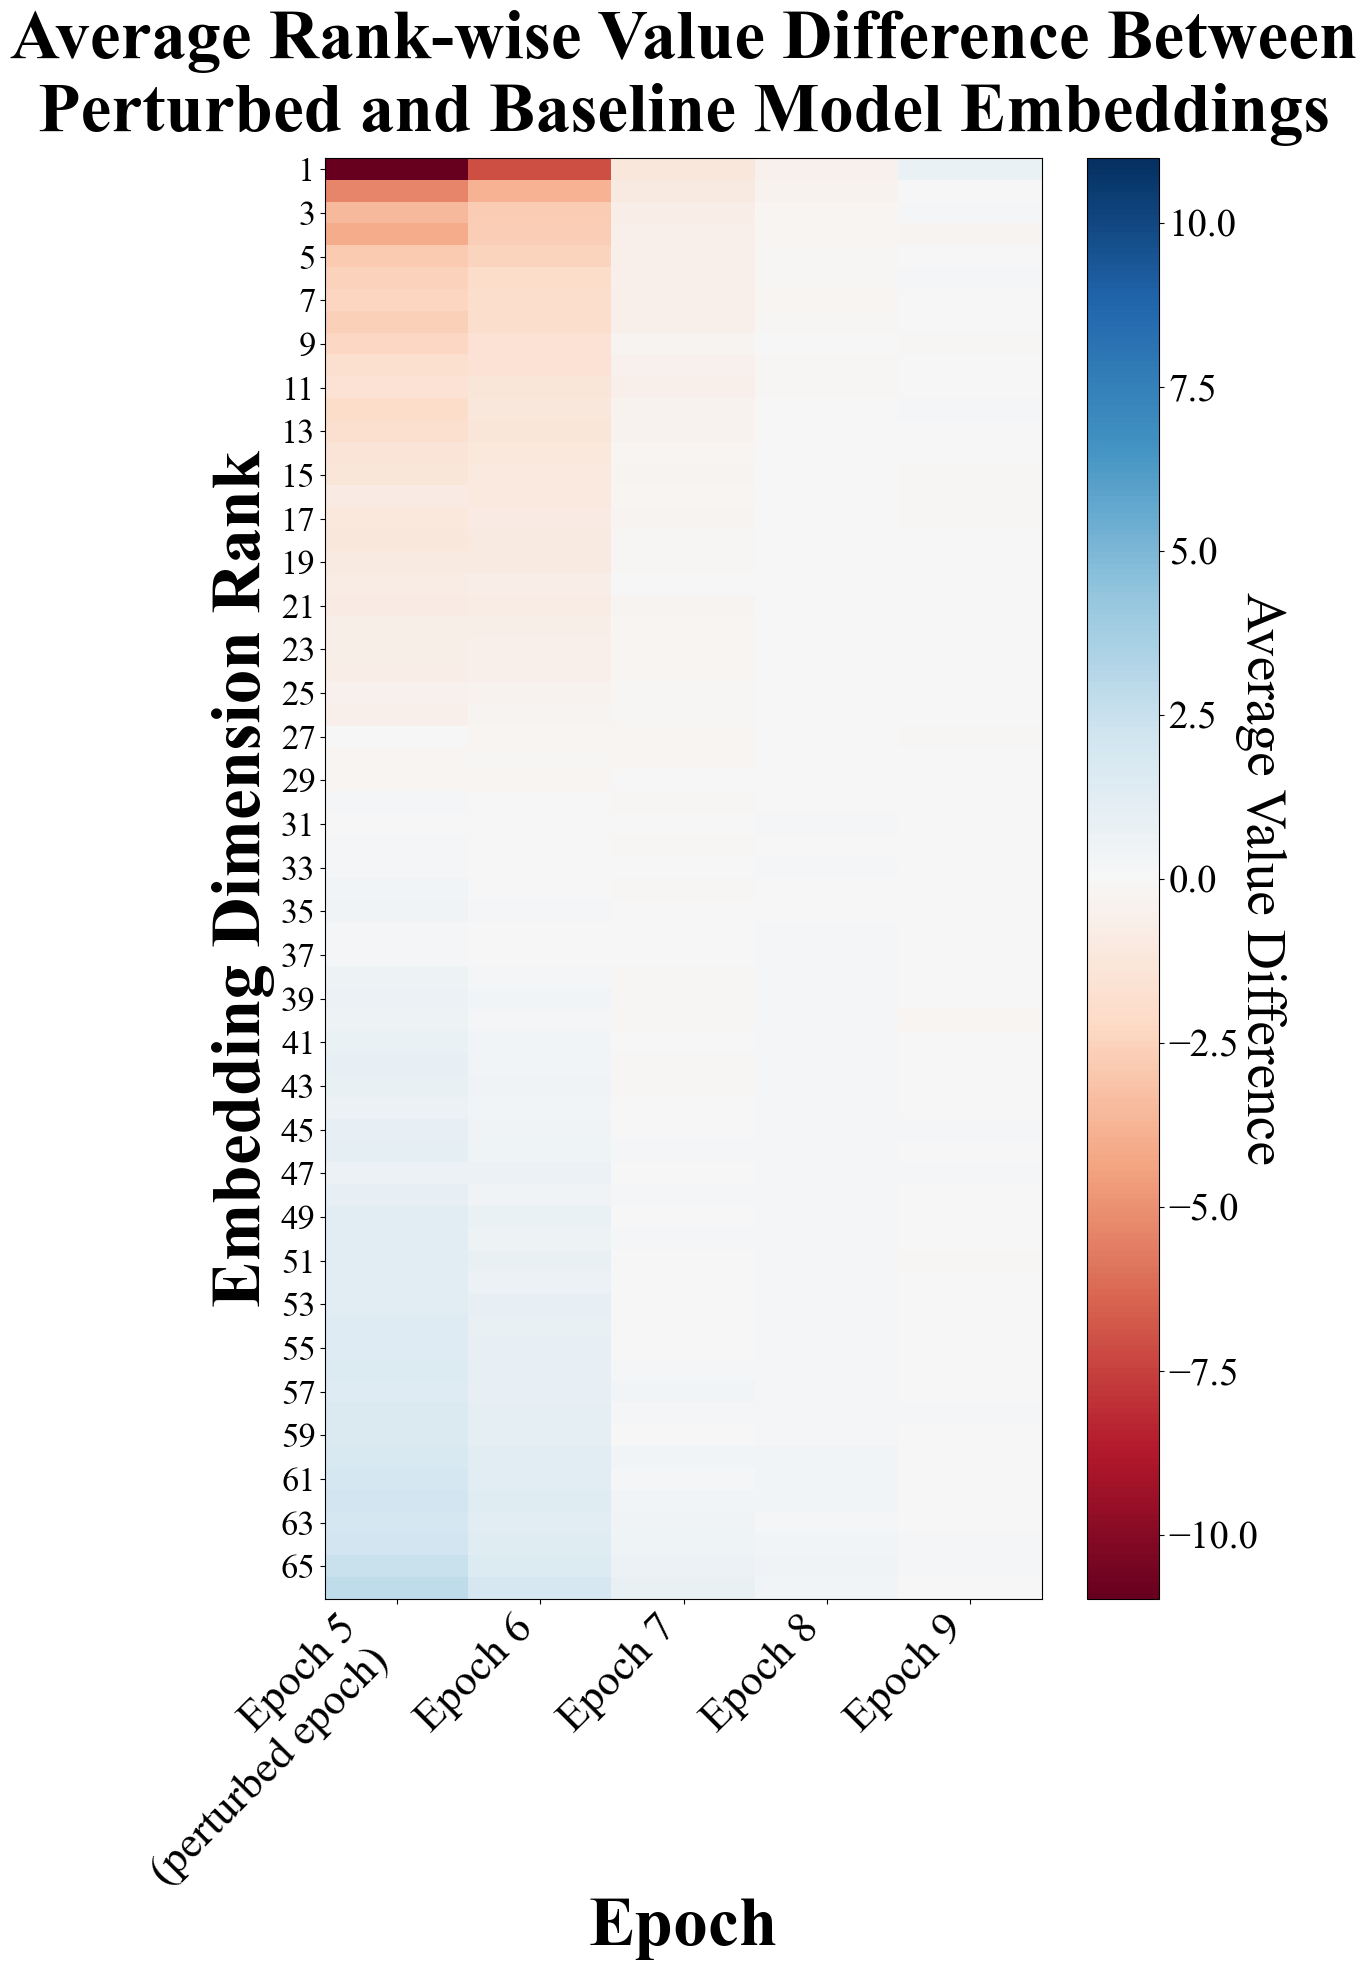

In [71]:
# Create heatmap for sweep_trainingrun5_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun5 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run5/things_48_inference_results'

fig_run5, ax_run5, heatmap_data_run5, ranked_avg_results_run5 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun5,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()


Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 81 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -12.350693 to 2.692920


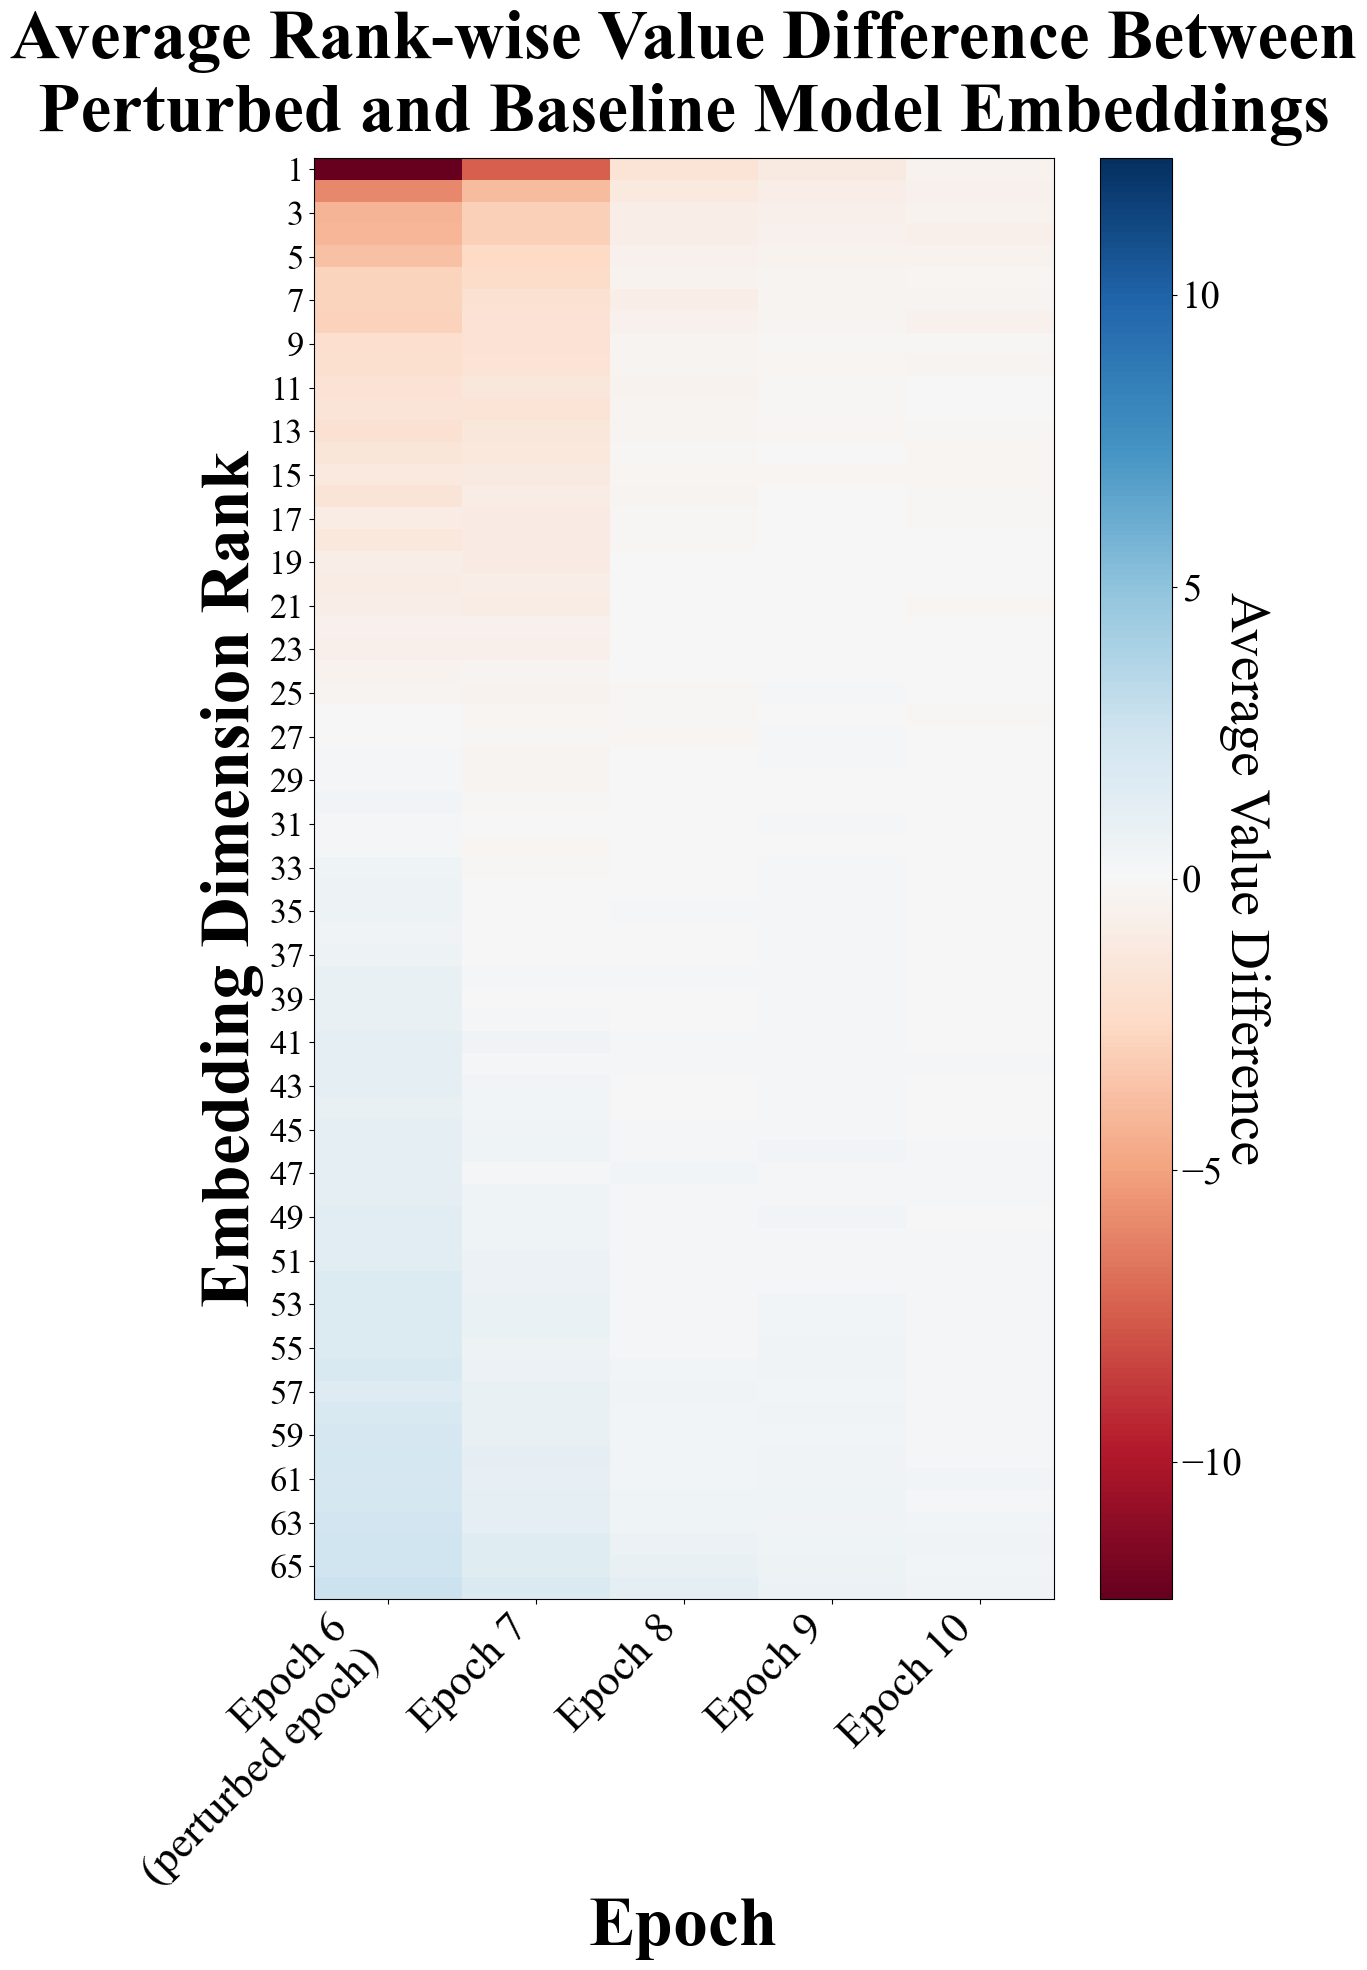

In [69]:
# Create heatmap for sweep_trainingrun6_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun6 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run6/things_48_inference_results'

fig_run6, ax_run6, heatmap_data_run6, ranked_avg_results_run6 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun6,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()

Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 80 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -13.024954 to 2.559869


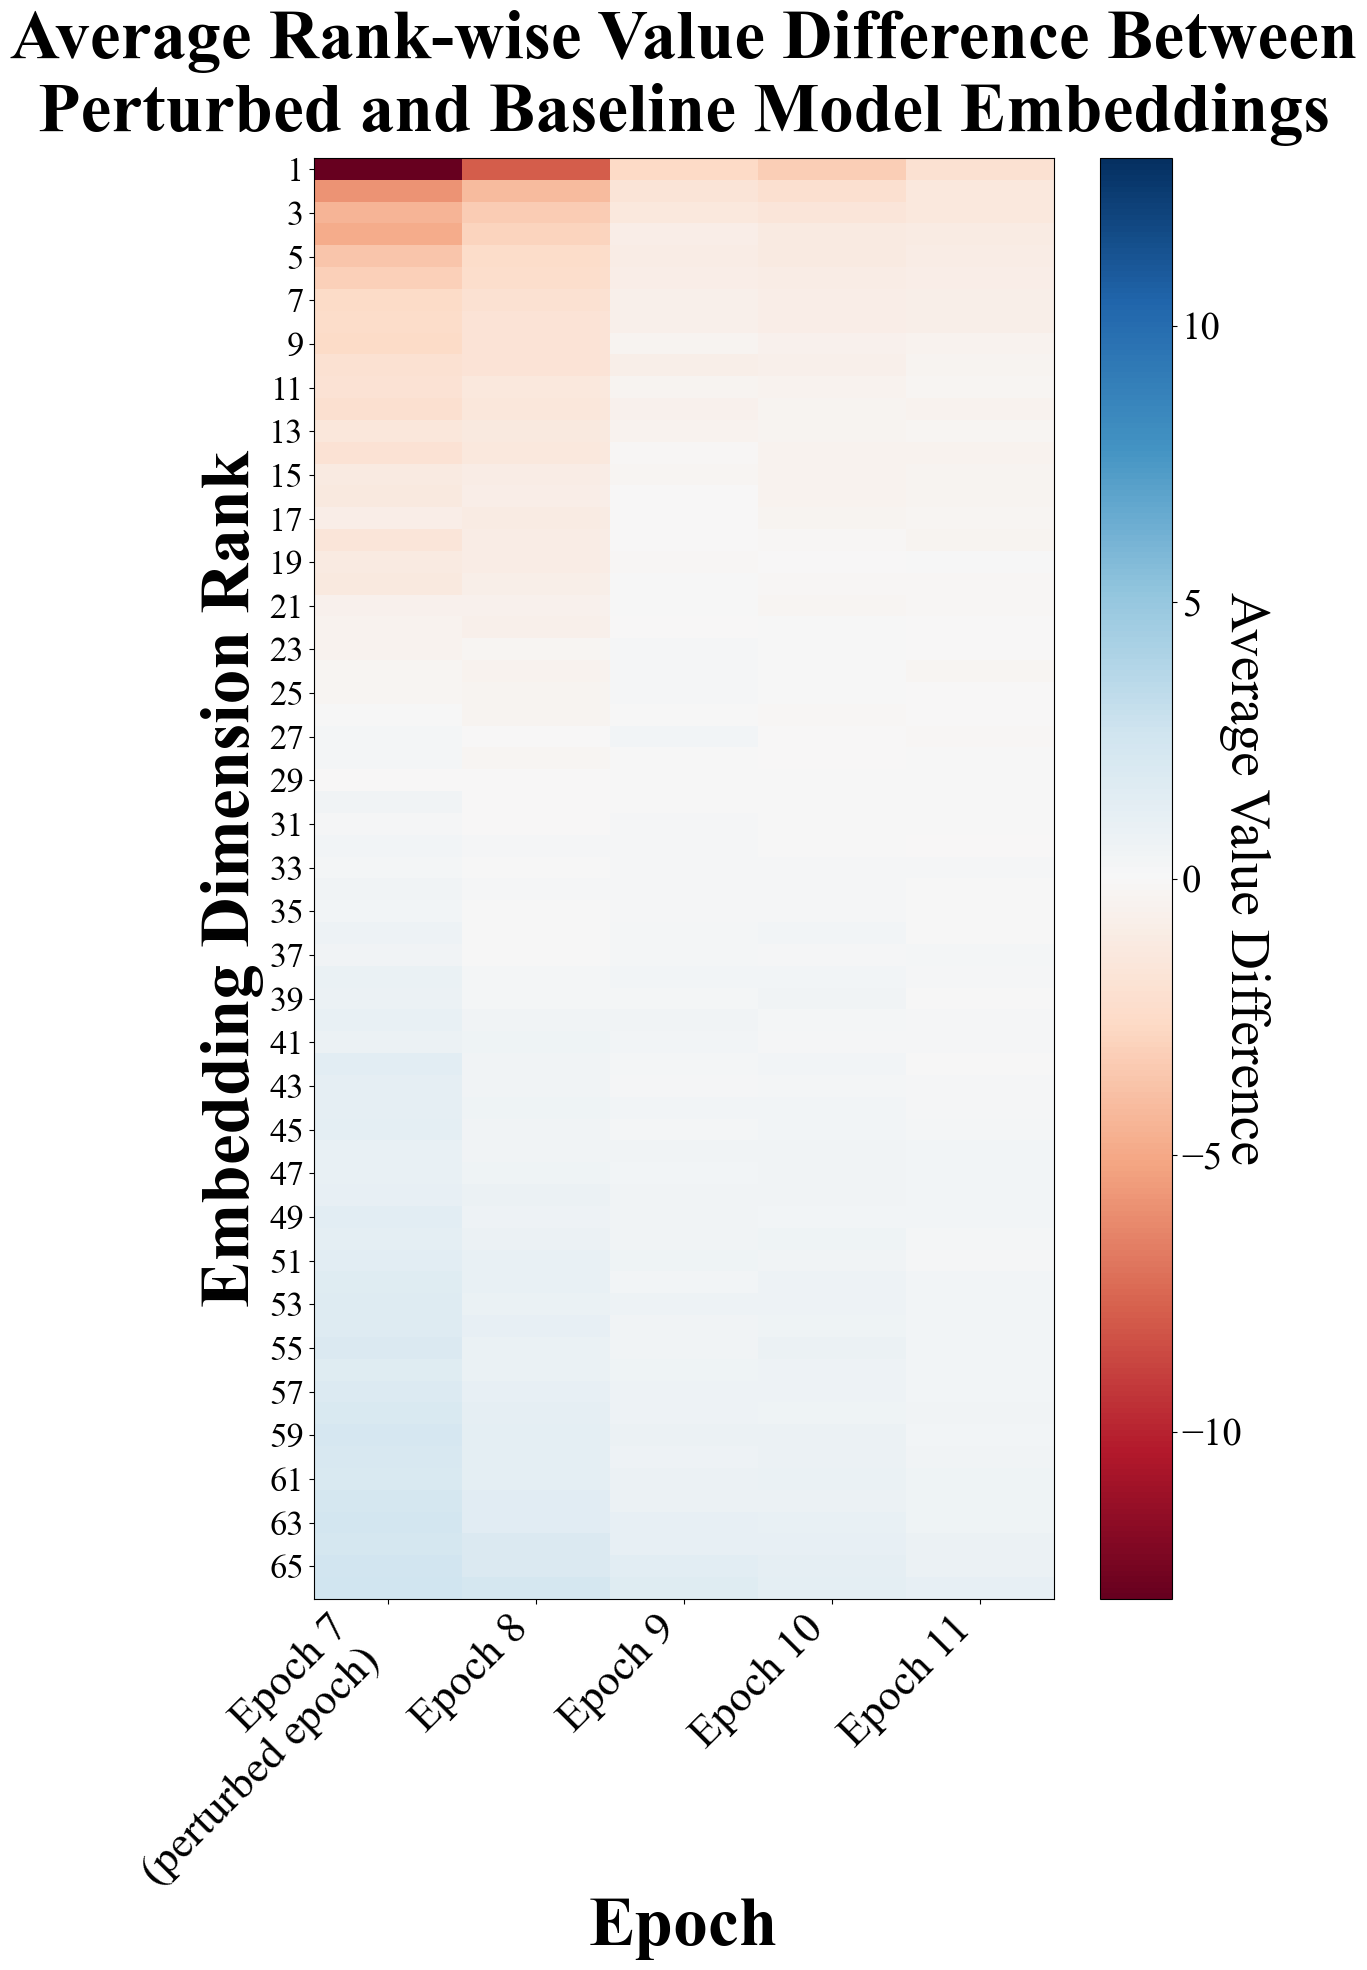

In [70]:
# Create heatmap for sweep_trainingrun7_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun7 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run7/things_48_inference_results'

fig_run7, ax_run7, heatmap_data_run7, ranked_avg_results_run7 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun7,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()

Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 70 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -26.384761 to 7.085721


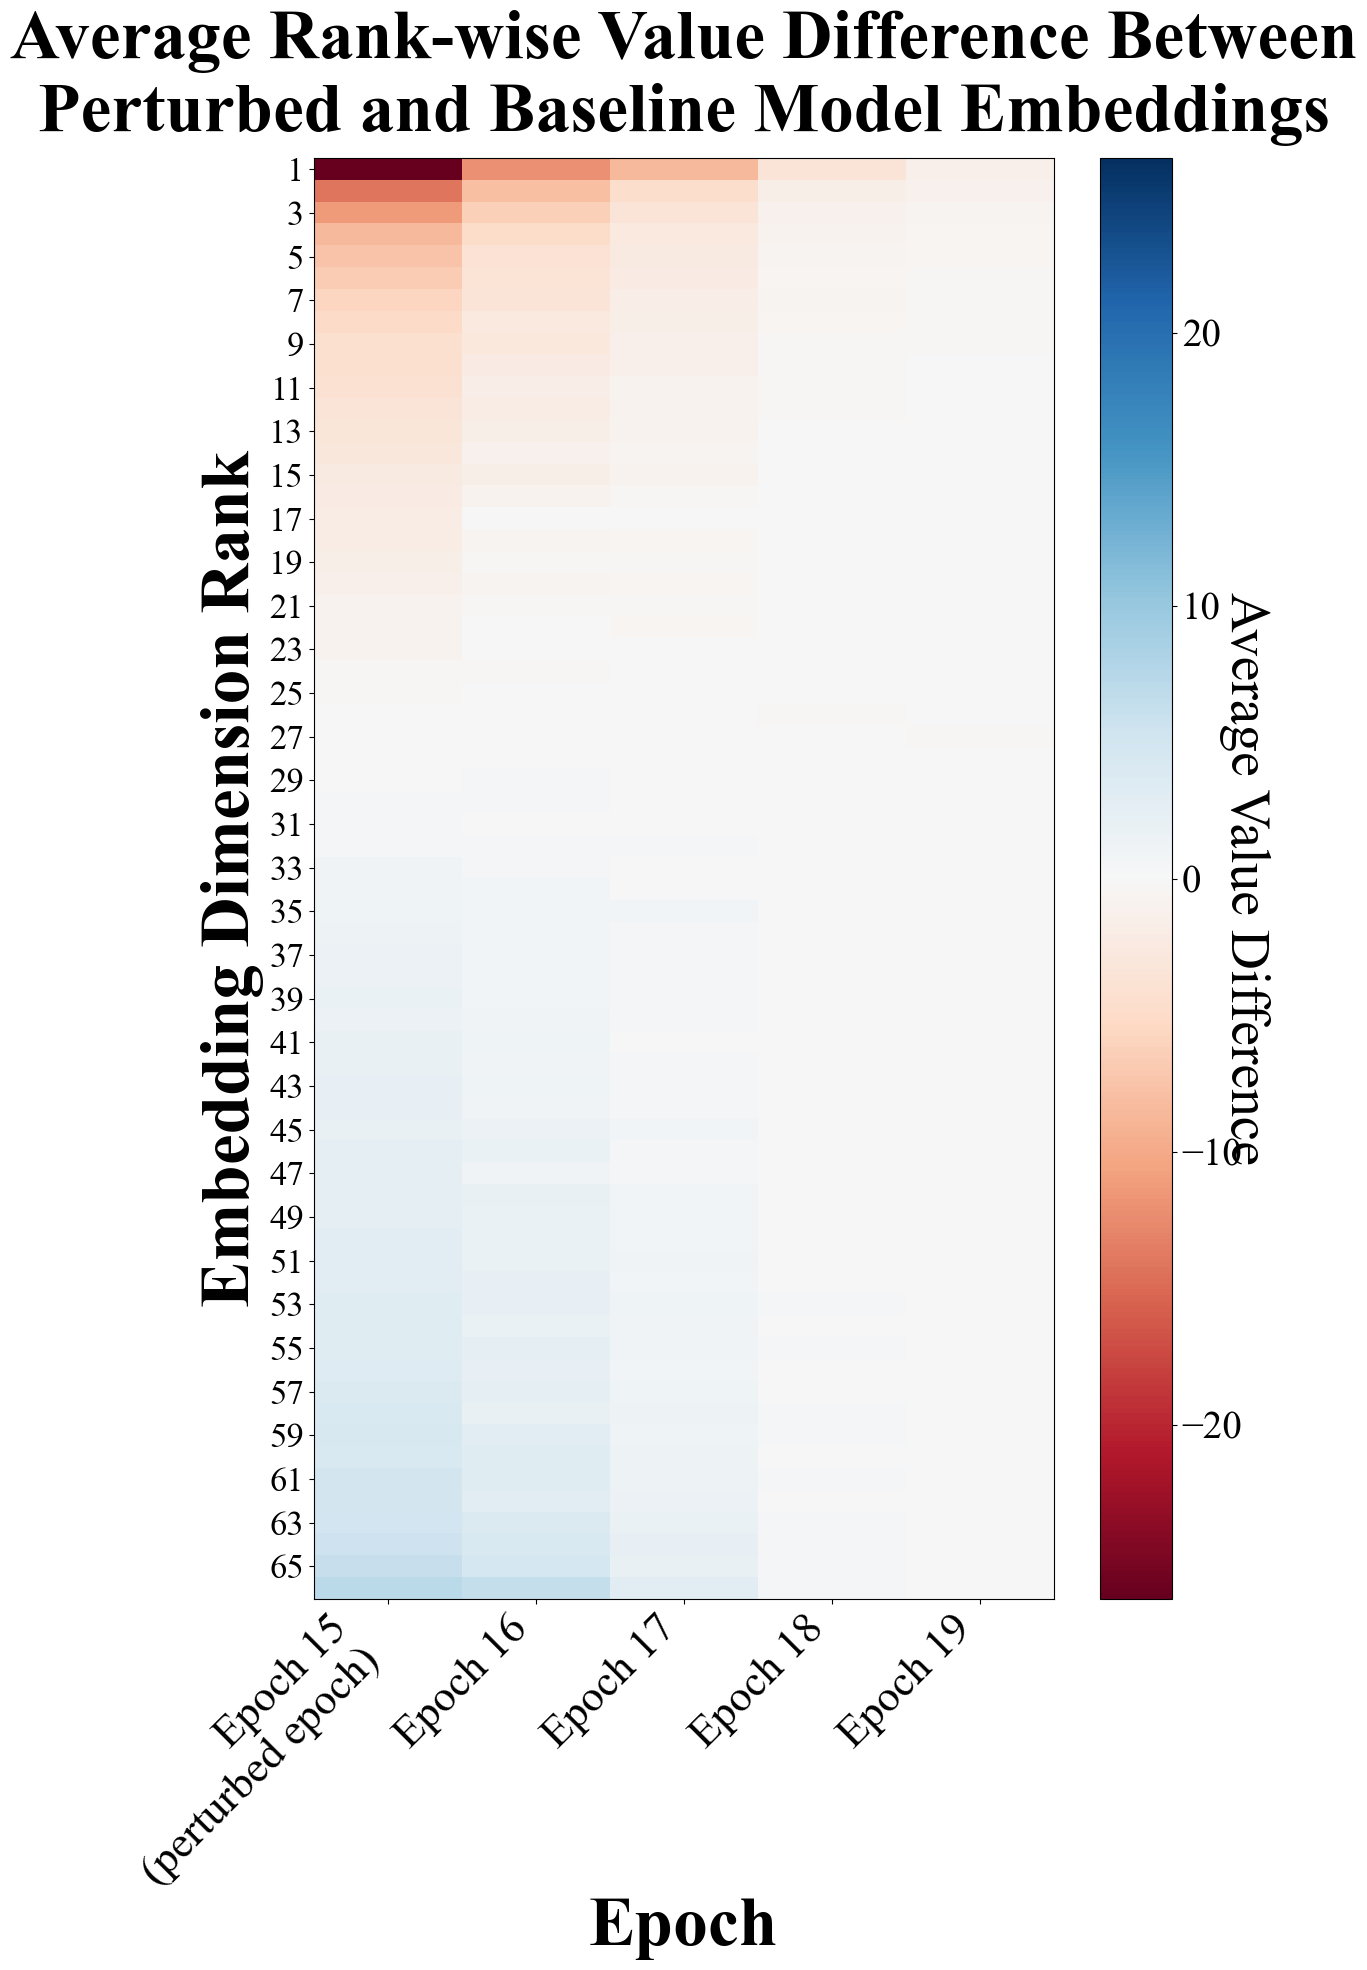

In [ ]:
# Create heatmap for sweep_trainingrun15_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun15 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run15/things_48_inference_results'

fig_run15, ax_run15, heatmap_data_run15, ranked_avg_results_run15 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun15,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()


Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 40 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -35.875592 to 9.030899


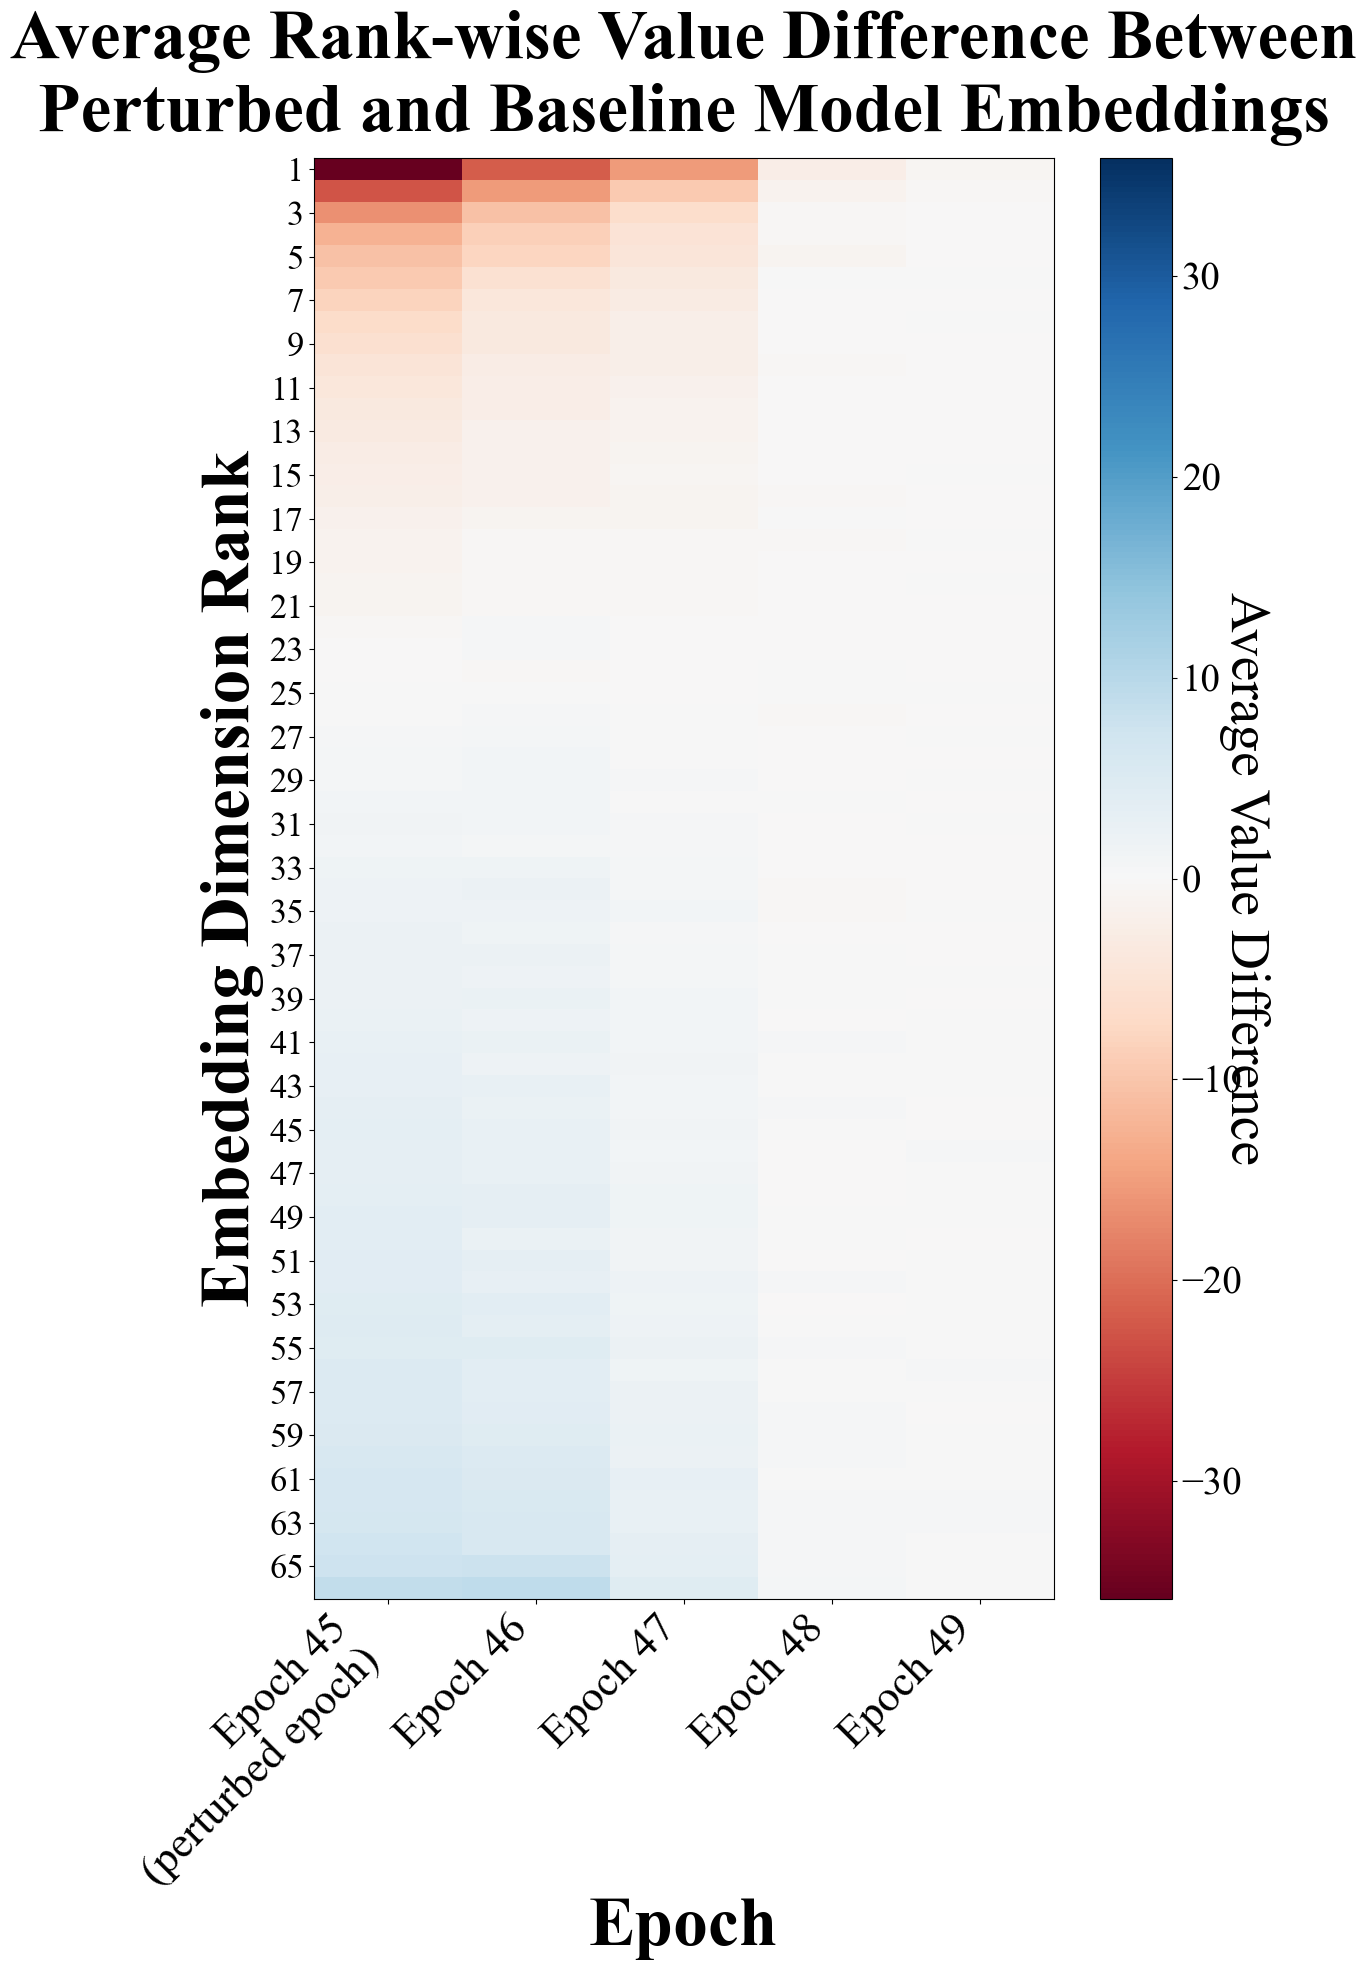

In [ ]:
# Create heatmap for sweep_trainingrun45_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun45 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run45/things_48_inference_results'

fig_run45, ax_run45, heatmap_data_run45, ranked_avg_results_run45 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun45,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()

Loading baseline embeddings...
Loading sweep embeddings...
Creating rank-ordered embeddings...
Computing value differences...
Computed value differences for 25 epochs
Averaging value differences by rank...
Creating heatmap...
Heatmap dimensions: 66 ranks × 5 epochs
Value range: -38.750743 to 10.245933


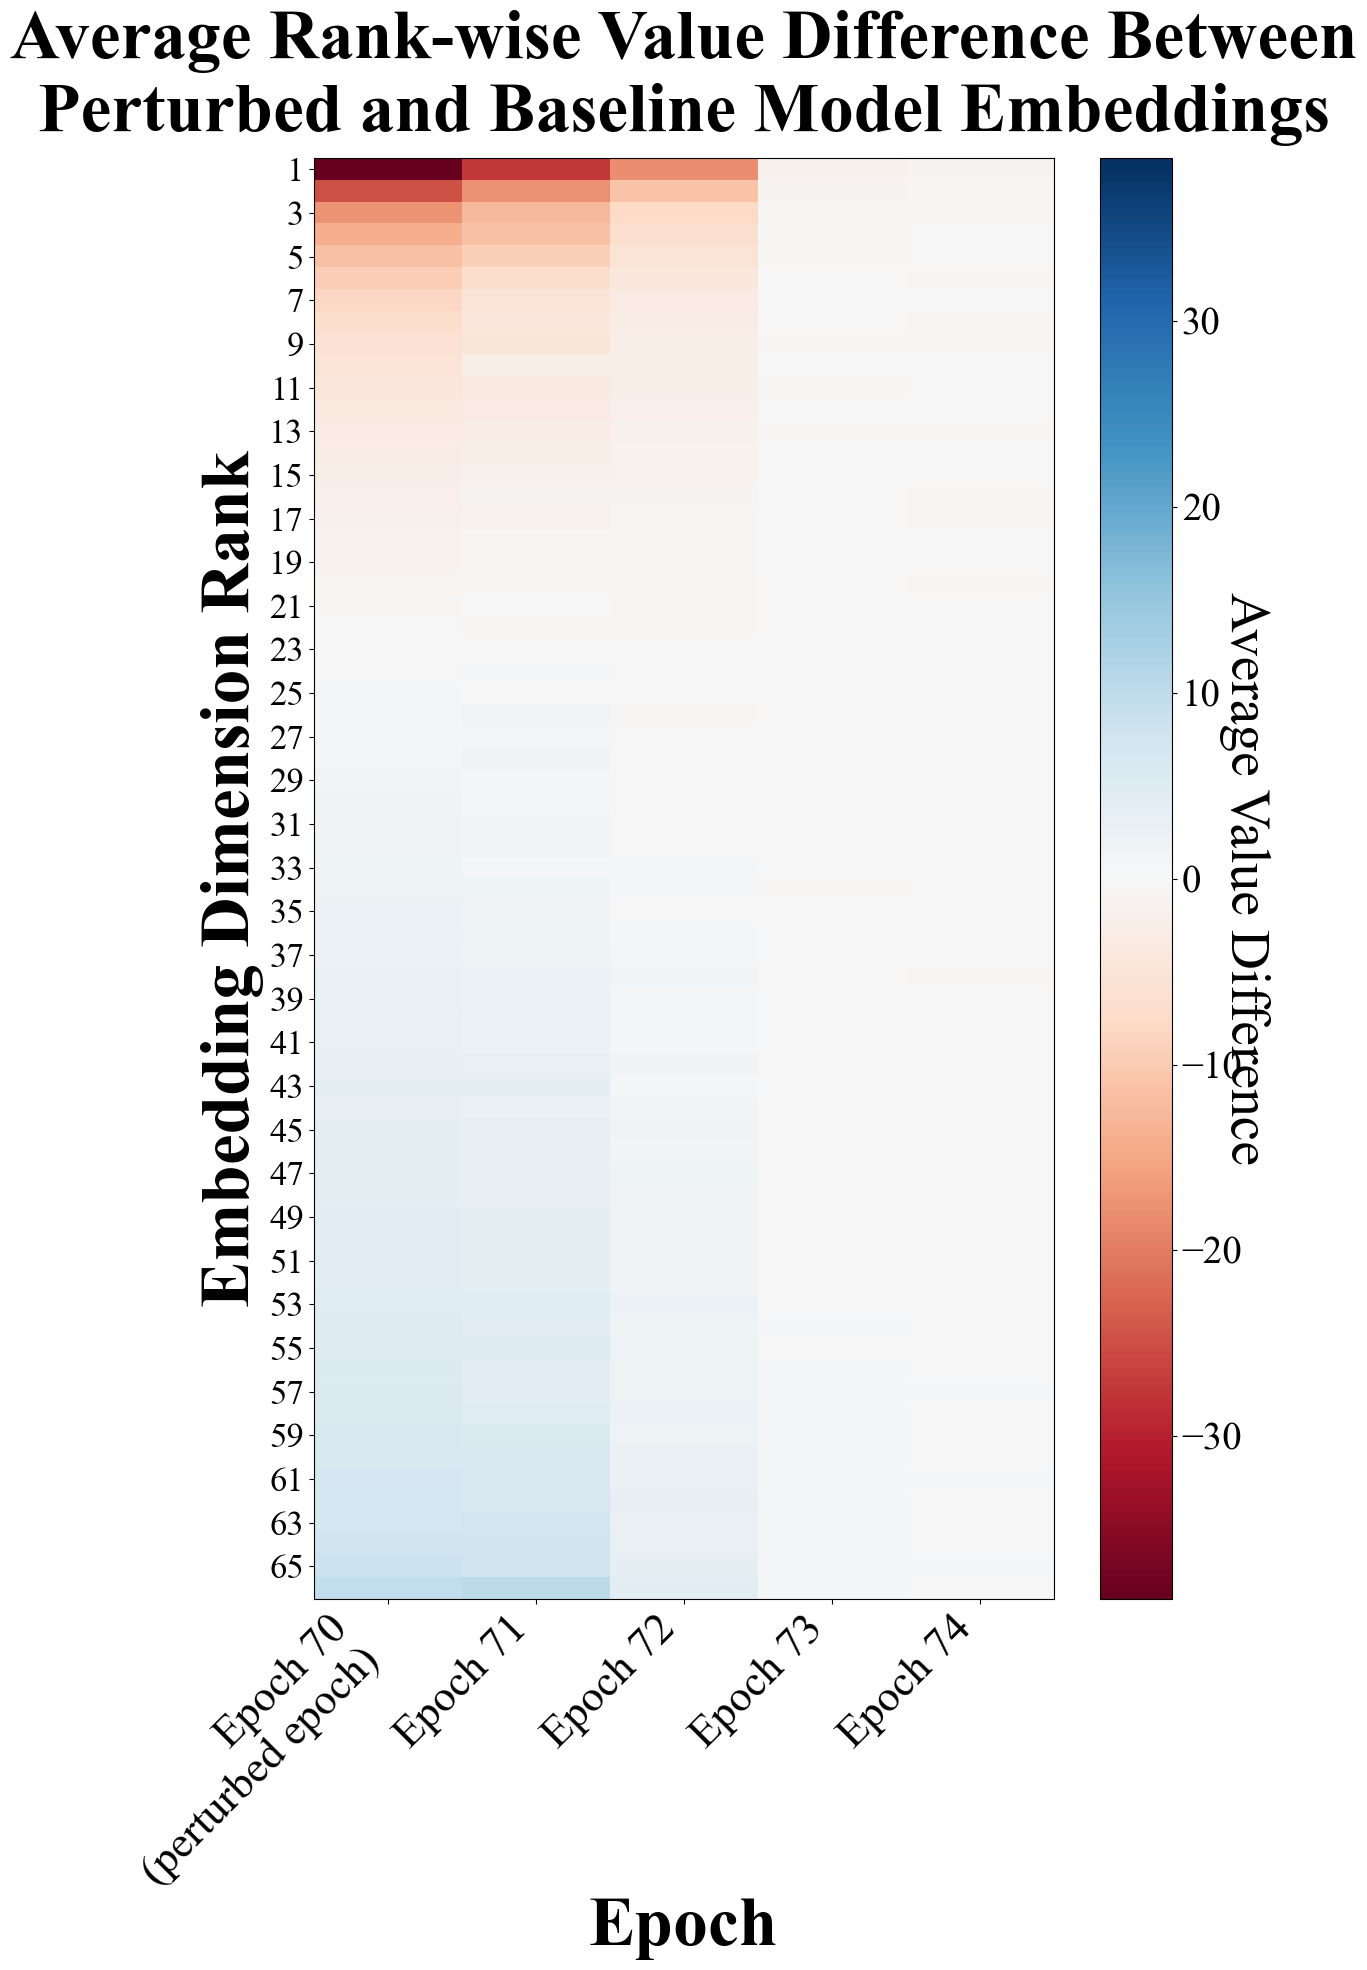

In [ ]:
# Create heatmap for sweep_trainingrun70_48_things

baseline_dir = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/inference_results/things_48_inference_results'

sweep_dir_trainingrun70 = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/single_epoch_perturbation_sweeps/perturb_sweep_baselineseed1_perturbseed42/training_run70/things_48_inference_results'

fig_run70, ax_run70, heatmap_data_run70, ranked_avg_results_run70 = process_experiment_and_create_heatmap(
    baseline_dir=baseline_dir,
    sweep_dir=sweep_dir_trainingrun70,
    labels_path='../Data/labels66.txt',
    max_epochs=5,  # Only show first 5 epochs (or None for all)
    show_text=True
)

plt.show()